# Homework: Text Classification

## Problem

* Apply methods to a dataset


In [ ]:
from fastai.text.all import *
import pandas as pd

# Apply Text Methods

Choose a dataset and fit a text classifier to some feature of interest, and assess the accuracy.

*The dataset you pick needs to have more than two possible outcomes, rather than just being binary. This makes the confusion matrix more interesting.*

What accuracy can you get after just 1 or 2 epochs?

Make a confusion matrix. What are the most common kinds of errors? Why do you think that is?

Here are some datasets to try:

* [Fake News](https://www.kaggle.com/datasets/stevenpeutz/misinformation-fake-news-text-dataset-79k)
* [Amazon Music Reviews](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon/links.html)
* [Steam Game Reviews](https://www.kaggle.com/datasets/andrewmvd/steam-reviews)
* [TripAdvisor Hotel Reviews](https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews)

Hints to get things running more smoothly:
1. You need to use GPU
2. Note that in the example in the notes, it took *5 minutes* to run a single epoch for a dataset with 5000 entries that were all about 140 characters long. Cut down your dataset substantially, and only run for 1, maybe 2 epochs.

In [ ]:
hotel = pd.read_csv("tripadvisor_hotel_reviews.csv", sep=",", names=["Review", "Rating"])
hotel = hotel.drop(0)
hotel.head()

,Review,Rating
1,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4
2,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished h...",2
3,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car serv...",3
4,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless internet hotel worked suite 2 laptops, decor lovely eclectic mix pattens color palatte, animal print bathrobes feel like rock stars, nice did n't look like sterile chain hotel hotel personality excellent sta...",5
5,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language face priceless, ass told, said large city, told head doorman issue called cab company promply answer did n't, apologized offered pay taxi, bucks 2 miles stadium, game plan taxi return going humpin, gr...",5


In [ ]:
hotel["Rating"].max()

'5'

In [ ]:
hotel["Rating"].min()

'1'

In [ ]:
dls = TextDataLoaders.from_df(hotel, text_col="Review", label_col="Rating")

In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device)


SuggestedLRs(valley=0.0030199517495930195)

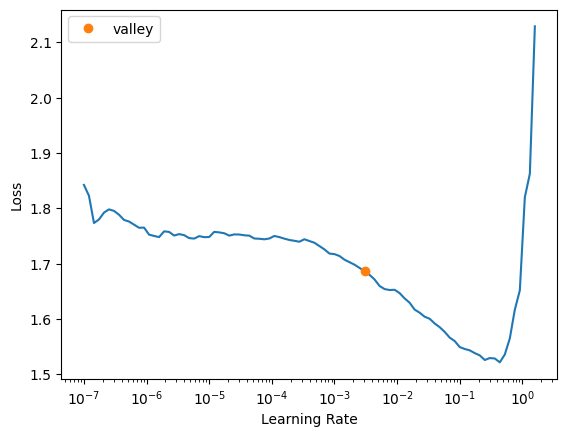

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.152086,1.027498,0.544412,00:43


epoch,train_loss,valid_loss,accuracy,time
0,0.910722,0.859852,0.631040,01:43
1,0.825471,0.808689,0.645437,01:43


Able to get 60% accuracy, which is pretty alright considering there are 5 possible answers which would indicate a likely null accuracy of 20%, to be sure though Ill see what the real null accuracy is around

In [ ]:
hotel["Rating"].value_counts() #5 has the most entries

,count
Rating,
5,9054
4,6039
3,2184
2,1793
1,1421


In [ ]:
9054/len(hotel) #44% null accuracy, so less impressive than I thought, but still solid

0.44185252061880825

# **Confusion Matrix**

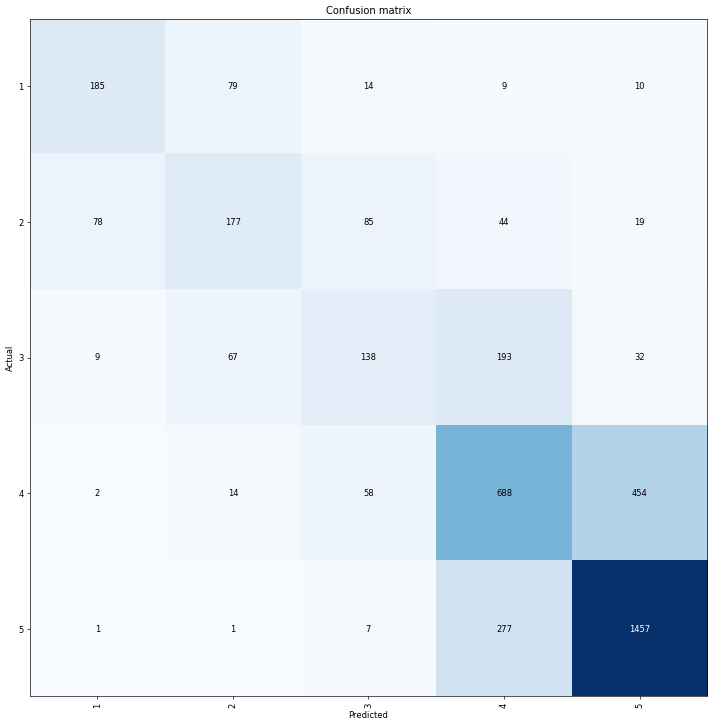

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

The most common errors occur when trying to predict 4 3 and 2 ratings. This could be because these reviews in the middle probably touch on aspects which are both positive and negative, using some words that lean in favor of a higher review and some that lean in favor of a lower one. This is probably harder for the model to predict than a 5 star review or a 1 star review, which those probably tend to even be only positive or negative sounding.